# Data606- PaperCraft Project Dataset Exploration

## Import Libraries

In [5]:
import requests
import csv
import xml.etree.ElementTree as ET
import uuid
import numpy as np
from time import sleep
import pandas as pd

## Dataset Preparation (Scraping)

In [12]:
def get_data(keyword, category, sortby, sort_order, max_results, start):

    url = f"http://export.arxiv.org/api/query?search_query=cat:{category}&max_results={max_results}&sort_by={sortby}&sort_order{sort_order}&start={start}"

    response = requests.get(url)

    root = ET.fromstring(response.content)
    data = []
    for entry in root.findall('{http://www.w3.org/2005/Atom}entry'):
        title = entry.find('{http://www.w3.org/2005/Atom}title').text
        summary = entry.find('{http://www.w3.org/2005/Atom}summary').text
        author = entry.find('{http://www.w3.org/2005/Atom}author/{http://www.w3.org/2005/Atom}name').text
        published = entry.find('{http://www.w3.org/2005/Atom}published').text
        link = entry.find('{http://www.w3.org/2005/Atom}link[@type="text/html"]')
        if link is not None:
            link = link.attrib['href']

        data.append([uuid.uuid4(), title, summary, author, published, link])
    return data

## Import Dataset

In [7]:
df=pd.read_csv('arxiv_data.csv')

## Dataset Size

In [11]:
df.shape

(9500, 5)

## Dataset Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 774373a4-8aa1-49ae-9707-4a20a6c3558d to e359c067-05d7-45d7-b51e-471683004a30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         9500 non-null   object
 1   Title      9500 non-null   object
 2   Summary    9500 non-null   object
 3   Authors    9500 non-null   object
 4   Published  9500 non-null   object
dtypes: object(5)
memory usage: 703.4+ KB


## Sample Values

In [30]:
df.head()

,Id,Title,Summary,Authors,Published,PublicationSource
774373a4-8aa1-49ae-9707-4a20a6c3558d,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-under...,M. P. Wellman,1993-08-01T00:00:00Z,http://arxiv.org/abs/cs/9308102v1,arxiv.org
3aa3b1eb-6219-4f6a-8025-9708e1c3cba5,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in ...,I. P. Gent,1993-09-01T00:00:00Z,http://arxiv.org/abs/cs/9309101v1,arxiv.org
e0a52b84-b04e-413c-8f4e-ef13b190be7a,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (...,F. Bergadano,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311101v1,arxiv.org
0cece879-3e29-4faf-90e5-2e2c9b19aad0,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to rec...,J. C. Schlimmer,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311102v1,arxiv.org
aa9305bb-b2db-49c3-9cdb-904741f57596,Decidable Reasoning in Terminological Knowledg...,Terminological knowledge representation syst...,M. Buchheit,1993-12-01T00:00:00Z,http://arxiv.org/abs/cs/9312101v1,arxiv.org


## Preprocessing

### Summary Statistics

In [18]:
df.describe(include='object')

,Id,Title,Summary,Authors,Published,PublicationSource
count,9500,9500,9500,9500,9500,9500
unique,9479,9492,6519,9401,9500,1
top,Ordinal Monte Carlo Tree Search,Markov decision processes (MDPs) are widely ...,Joseph Y. Halpern,2012-02-14T16:41:17Z,http://arxiv.org/abs/cs/9308102v1,arxiv.org
freq,2,2,43,25,1,9500


### Handling Missing Data/Null Values

In [19]:
df.isna().sum()

Id                   0
Title                0
Summary              0
Authors              0
Published            0
PublicationSource    0
dtype: int64

In [20]:
df.nunique()

Id                   9479
Title                9492
Summary              6519
Authors              9401
Published            9500
PublicationSource       1
dtype: int64

### Exploring Title length for different papers

<Axes: >

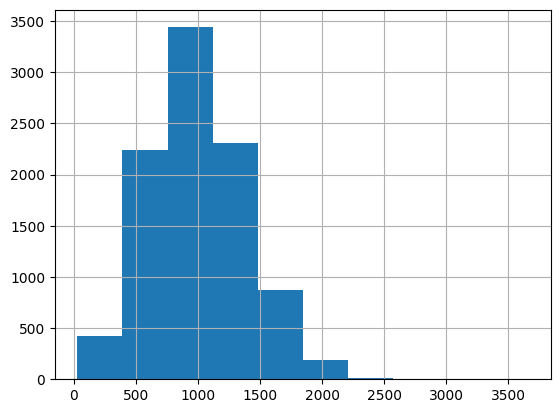

In [31]:
df['Title'].str.len().hist()

### Stopwords analysis

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

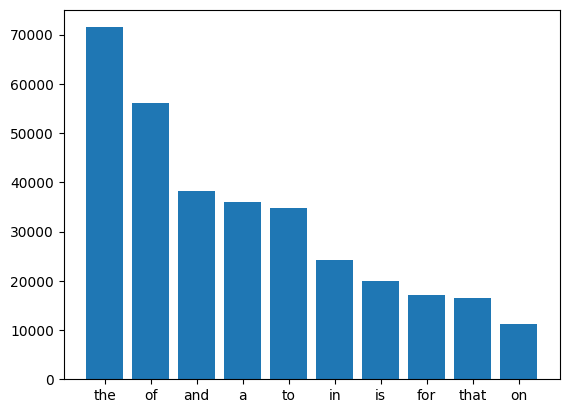

In [35]:
plot_top_stopwords_barchart(df['Title'])


In [26]:

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

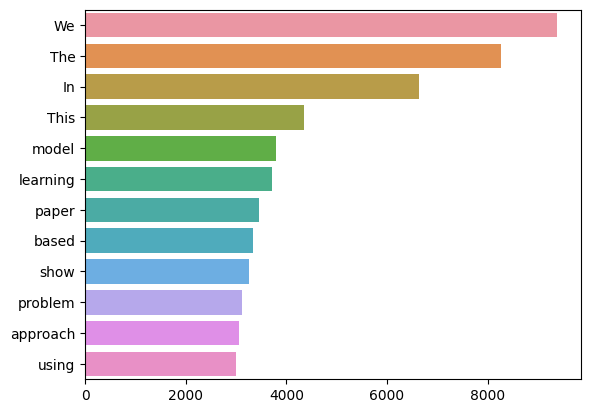

In [32]:
plot_top_non_stopwords_barchart(df['Title'])